# Data Exploration of Ultimate Technologies

The goal of this notebook is to understand the login data provided by Ultimate Technologies and then be able to identify patterns in the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

First, we need to import the data and analyze what's in it.

In [2]:
df = pd.read_json('logins.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Let's resample the data to 15 minute intervals to standardize the data.

In [4]:
df.set_index('login_time', inplace=True)
df['count'] = 1
df.sort_index(inplace=True)
df = df.resample("15min").sum()

In [5]:
df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Let's plot the data so we can visualize what is happening.

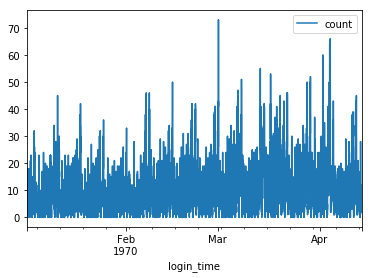

In [6]:
df.plot()
plt.show()

There is alot of activity happening in this data. One thing we can notice off the bat is that the frequency of logins spikes in a similar pattern. This could be attributed to the fact that more people login on the weekends over the weekdays. Let's narrow the scope of our data to get confirmation of this

In [7]:
jan = df['1970-01-01': '1970-01-31']
feb = df['1970-02-01': '1970-02-28']
march = df['1970-03-01': '1970-03-31']
april = df['1970-04-01': '1970-04-30']

<function matplotlib.pyplot.show(*args, **kw)>

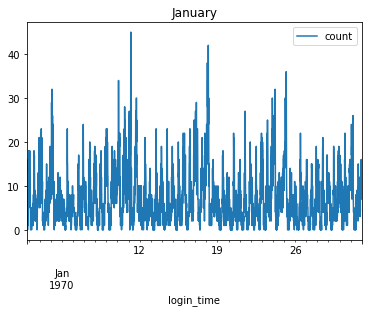

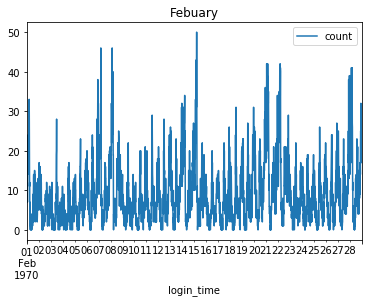

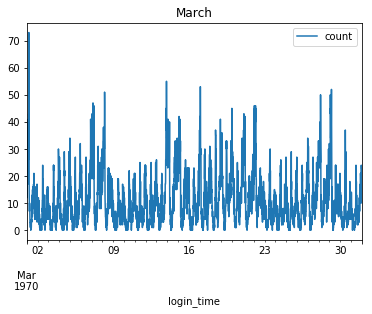

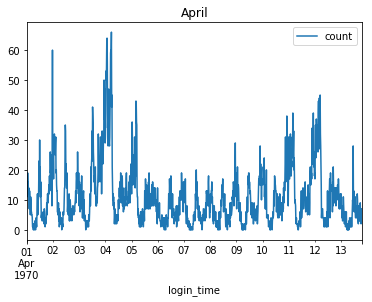

In [8]:
jan.plot()
plt.title('January')
feb.plot()
plt.title('Febuary')
march.plot()
plt.title('March')
april.plot()
plt.title('April')
plt.show

Looking at each month, we can confirm that the spike trends continue. Now, lets compare the number of logins for each day in the week.

In [9]:
print("January Max: ", jan.max())
print("Febuary Max: ", feb.max())
print("March Max: ", march.max())
print("April Max: ", april.max())

January Max:  count    45
dtype: int64
Febuary Max:  count    50
dtype: int64
March Max:  count    73
dtype: int64
April Max:  count    66
dtype: int64


In [10]:
jan['weekday'] = pd.to_datetime(jan.index)
feb['weekday'] = pd.to_datetime(feb.index)
march['weekday'] = pd.to_datetime(march.index)
april['weekday'] = pd.to_datetime(april.index)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [11]:
jan['weekday']=jan['weekday'].apply(lambda x: x.day_name())
feb['weekday']=feb['weekday'].apply(lambda x: x.day_name())
march['weekday']=march['weekday'].apply(lambda x: x.day_name())
april['weekday']=april['weekday'].apply(lambda x: x.day_name())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

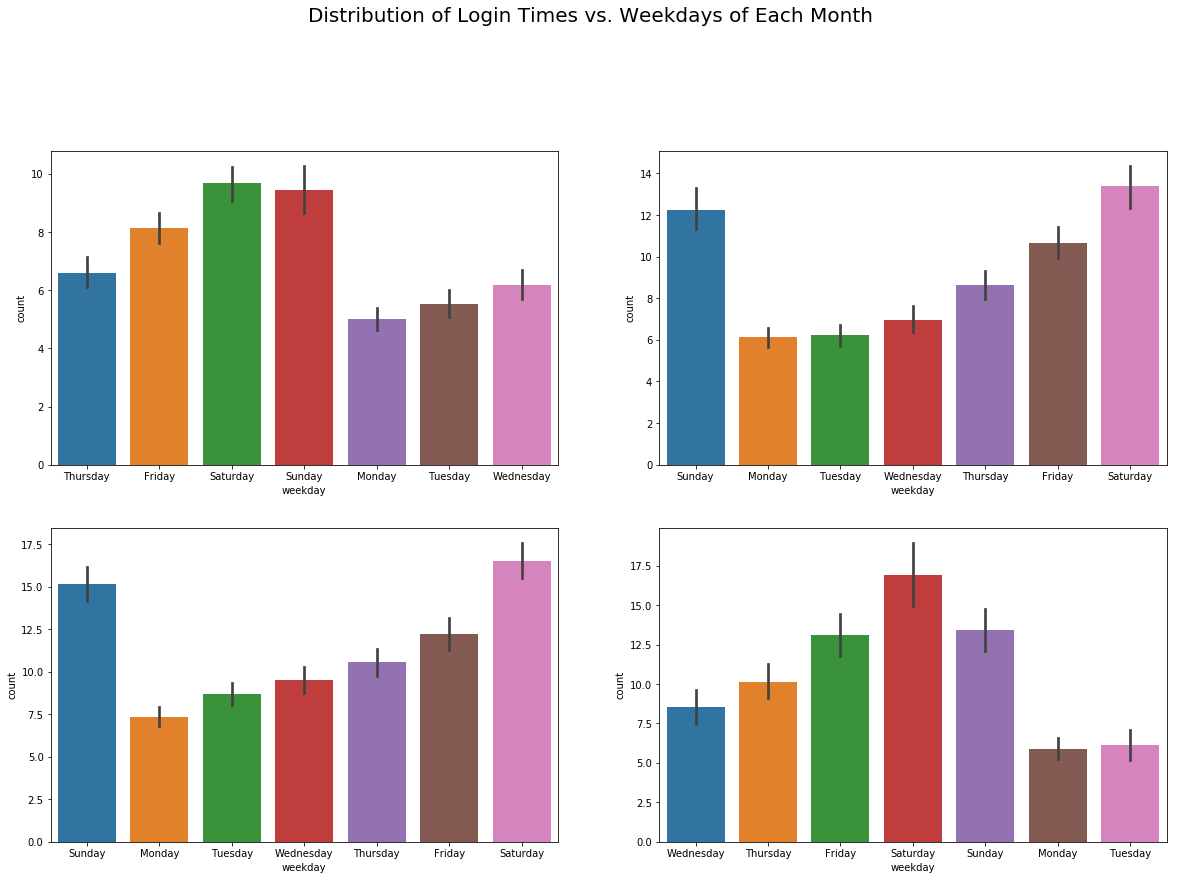

In [12]:
fig,ax = plt.subplots(2,2, figsize=(20,20))               
plt.suptitle("Distribution of Login Times vs. Weekdays of Each Month", fontsize=20)
sns.barplot(x='weekday', y='count', data=jan, ax = ax[0,0])
sns.barplot(x='weekday', y='count', data=feb, ax = ax[0,1])
sns.barplot(x='weekday', y='count', data=march, ax = ax[1,0])
sns.barplot(x='weekday', y='count', data=april, ax = ax[1,1])
plt.subplots_adjust(bottom=0.4)
plt.show()

Looking at this graph, we can confrim that weekends have the biggest spikes, with Friday, Saturday, and Sunday having higher peaks than the rest of the data. This confirms our hypothesis that the weekends have more logins. 